In [10]:
%cd /home/smalani/Cybernetic

from growth import parFun as growth_parFun
from growth import odeFun as growth_odeFun
import numpy as np

/home/smalani/Cybernetic


In [11]:
from scipy.integrate import solve_ivp

out = []
out_t = []

# X, G, E, O, e1, e2, e3, C
# initial = 1, 0, 3.5, 7.5, 0.4, 0.4, 0.4, 0
initial = 0.1, 9, 0, 7.5, 0.5, 0.5, 0.5, 0
tspan = [0, 7]
pars = growth_parFun(alpha_mult=[1,1,1], beta_mult=[1,1,1])

# initial = sol.y[:,-1]

sol = solve_ivp(growth_odeFun, tspan, initial, args=(pars,), 
                    rtol=1e-12, atol=1e-15, 
                    method='BDF'
                )

# assert False
# print(sol.status)
# print(sol.message)
# print(sol.success)

out.append(sol.y)
out_t.append(sol.t)

tspan = [7, 14]
pars = growth_parFun(alpha_mult=[0.1,1,1], beta_mult=[5,1,1])

initial = sol.y[:,-1]

sol = solve_ivp(growth_odeFun, tspan, initial, args=(pars,), 
                    rtol=1e-12, atol=1e-15, 
                    method='BDF'
                )
out.append(sol.y)
out_t.append(sol.t)

tspan = [14, 21]
pars = growth_parFun(alpha_mult=[1,1,1], beta_mult=[1,1,1])

initial = sol.y[:,-1]

sol = solve_ivp(growth_odeFun, tspan, initial, args=(pars,), 
                    rtol=1e-12, atol=1e-15, 
                    method='BDF'
                )
out.append(sol.y)
out_t.append(sol.t)


out = np.concatenate(out,axis=1)
out_t = np.concatenate(out_t)

print(out.shape)
print(out_t.shape)

(8, 1077)
(1077,)


(8, 562)


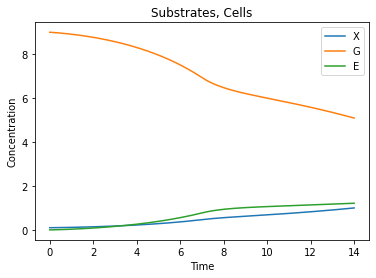

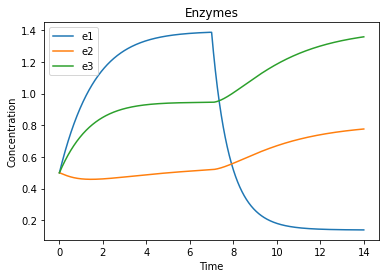

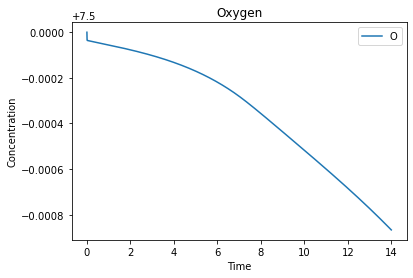

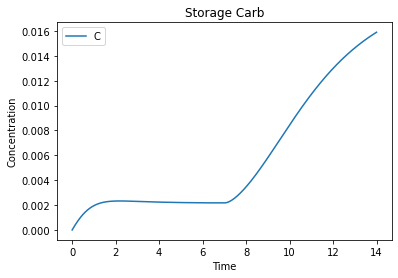

In [12]:
import matplotlib.pyplot as plt

print(sol.y.shape)
X, G, E, O, e1, e2, e3, C = out
t = out_t

len = 200000

plt.figure()
plt.plot(t, X, label='X')
plt.plot(t[:len], G[:len], label='G')
plt.plot(t, E, label='E')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Substrates, Cells')
plt.legend()

plt.figure()
plt.plot(t, e1, label='e1')
plt.plot(t, e2, label='e2')
plt.plot(t, e3, label='e3')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Enzymes')
plt.legend()

plt.figure()
plt.plot(t, O, label='O')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Oxygen')
plt.legend()

plt.figure()
plt.plot(t, C, label='C')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Storage Carb')
plt.legend()

